# Unsupervised Learning
### Goal of lesson
- Understand how Unsupervised Learning is different from Supervised Learning
- How it can organize data without knowledge
- Understand how $k$-Means Clustering works
- Train a $k$-Means Cluster model

### What is Unsupervised Learning?
- Given input data without any additional feedback - learn patterns
- The third large group of Machine Learning

### Clustering
- Organize a set of objects into groups in such a way that similar objects tend to be in the same group

### $k$-Means Clustering
- Algorithm for clustering data based on repeatedly assigning points to clusters and updating those clusters' centers.

![K Means Clustering](img/k_means.png)

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**sklearn**](https://scikit-learn.org/stable/) - tools for predictive data analysis
> - Functionality and concepts used
>     - [**KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to train (fit) the model

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [4]:
# Generate some numbers
data = np.random.randn(400,2)
data[:100] += 5, 5
data[100:200] += 10, 10
data[200:300] += 10, 5
data[300:] += 5, 10

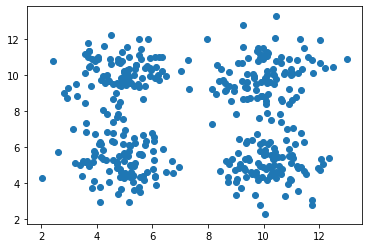

In [5]:
fig, ax = plt.subplots()

ax.scatter(x=data[:,0], y=data[:,1])

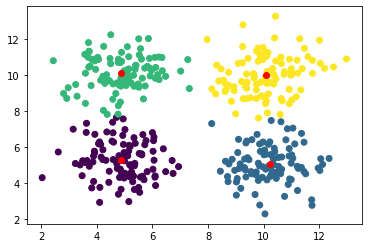

In [8]:
model = KMeans(n_clusters=4, init='random', random_state=42, max_iter=1000, n_init=1)

model.fit(data)

y_pred = model.predict(data)

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')

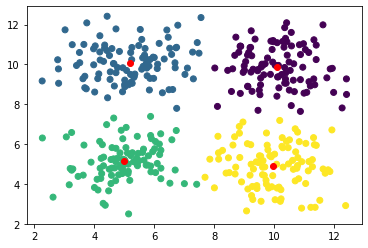

In [12]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42, max_iter=1000, n_init=1)

model.fit(data)

y_pred = model.predict(data)

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')

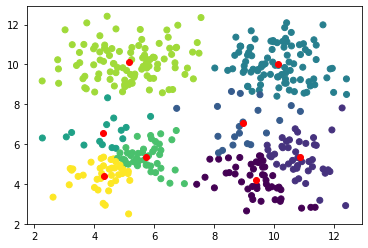

In [10]:
model = KMeans(n_clusters=8, init='random', random_state=42, max_iter=1000, n_init=1)

model.fit(data)

y_pred = model.predict(data)

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')

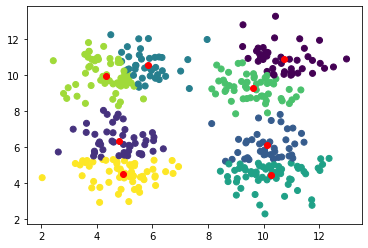

In [12]:
model = KMeans(n_clusters=8, init='k-means++', random_state=42, max_iter=1000, n_init=1)

model.fit(data)

y_pred = model.predict(data)

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')

In [27]:
silhouette_coefficients = []

for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    score = silhouette_score(data, model.labels_)
    silhouette_coefficients.append(score)

In [28]:
k1 = silhouette_coefficients.index(max(silhouette_coefficients))
silhouette_coefficients.pop(k1) # We took off k1 for next steps in order to have the second max value
k2 = silhouette_coefficients.index(max(silhouette_coefficients))
k1 += 1 # Adding one because index starts from 0
k2 +=2  # Adding 2 for the index starts and minus k1 to the selection
km = k1 if k1 >= k2 else k2
km

4

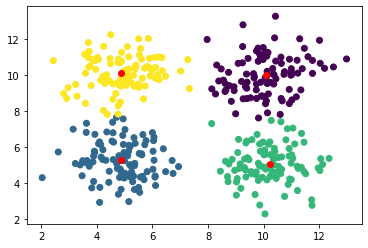

In [29]:
model = KMeans(n_clusters=km, init='k-means++', random_state=42, max_iter=1000, n_init=1)

model.fit(data)

y_pred = model.predict(data)

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')